# STEP 1: First Overview & Exploration

In [1]:
# Import relevant packages / libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_theme(style="whitegrid")

In [2]:
# Load in both World Happiness Report datasets
df1 = pd.read_csv("world-happiness-report.csv")
df2 = pd.read_csv("world-happiness-report-2021.csv")

In [3]:
# Display number of columns and rows per dataset
df_colrows = pd.DataFrame(data={"Number of columns":[len(df1.columns), len(df2.columns)], "Number of rows":[len(df1), len(df2)]}, index=["WHI", "WHI2021"])
display(df_colrows)
print("World Happiness Report:", len(df1.columns), "columns and", len(df1), "rows.")
print("World Happiness Report 2021:", len(df2.columns), "columns and", len(df2), "rows.")

,Number of columns,Number of rows
WHI,11,1949
WHI2021,20,149


World Happiness Report: 11 columns and 1949 rows.
World Happiness Report 2021: 20 columns and 149 rows.


In [4]:
# List column names of both datasets
df1_col_list = df1.columns.tolist()
df2_col_list = df2.columns.tolist()

display(df1_col_list)
print("\n")
display(df2_col_list)

['Country name',
 'year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

['Country name',
 'Regional indicator',
 'Ladder score',
 'Standard error of ladder score',
 'upperwhisker',
 'lowerwhisker',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Ladder score in Dystopia',
 'Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption',
 'Dystopia + residual']

In [5]:
# Check for rates of missing values
display(df1.isna().sum()/len(df1)*100)
print("\n")
display(df2.isna().sum()/len(df2)*100)

Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  1.847101
Social support                      0.667009
Healthy life expectancy at birth    2.821960
Freedom to make life choices        1.641868
Generosity                          4.566444
Perceptions of corruption           5.643920
Positive affect                     1.128784
Negative affect                     0.820934
dtype: float64

Country name                                  0.0
Regional indicator                            0.0
Ladder score                                  0.0
Standard error of ladder score                0.0
upperwhisker                                  0.0
lowerwhisker                                  0.0
Logged GDP per capita                         0.0
Social support                                0.0
Healthy life expectancy                       0.0
Freedom to make life choices                  0.0
Generosity                                    0.0
Perceptions of corruption                     0.0
Ladder score in Dystopia                      0.0
Explained by: Log GDP per capita              0.0
Explained by: Social support                  0.0
Explained by: Healthy life expectancy         0.0
Explained by: Freedom to make life choices    0.0
Explained by: Generosity                      0.0
Explained by: Perceptions of corruption       0.0
Dystopia + residual                           0.0


In [6]:
# Check for duplicates
display(df1.duplicated().sum())
display(df2.duplicated().sum())

0

0

In [7]:
# Check for correct data types
display(df1.dtypes)
print("\n")
display(df2.dtypes)

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [8]:
# Retrieve statistical information (pre-cleaning)
display(df1.describe())
display(df2.describe())

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [9]:
# Check if listings in categorical variable have >=10 modalities
print("Categorical variables in WHI have 10 or more modalities:\n", df1.select_dtypes(exclude="number").nunique()<10, "\n")
print("Categorical variables in WHI2021 have 10 or more modalities:\n", df2.select_dtypes(exclude="number").nunique()<10, "\n")

Categorical variables in WHI have 10 or more modalities:
 Country name    False
dtype: bool 

Categorical variables in WHI2021 have 10 or more modalities:
 Country name          False
Regional indicator    False
dtype: bool 



In [10]:
# Retrieve information about the categorical variables
print("Number of different countries in WHI:", df1["Country name"].value_counts().count())
print("Unique frequencies of countries listed in WHI:", df1["Country name"].value_counts().unique(),"\n")
# We can see that at least some of the countries appear only a few times

print("Number of different countries in WHI2021:", df2["Country name"].value_counts().count())
print("Number of regional indicators in WHI2021:", df2["Regional indicator"].value_counts().count())

Number of different countries in WHI: 166
Unique frequencies of countries listed in WHI: [15 14 13 12 11 10  9  8  7  6  5  4  3  2  1] 

Number of different countries in WHI2021: 149
Number of regional indicators in WHI2021: 10


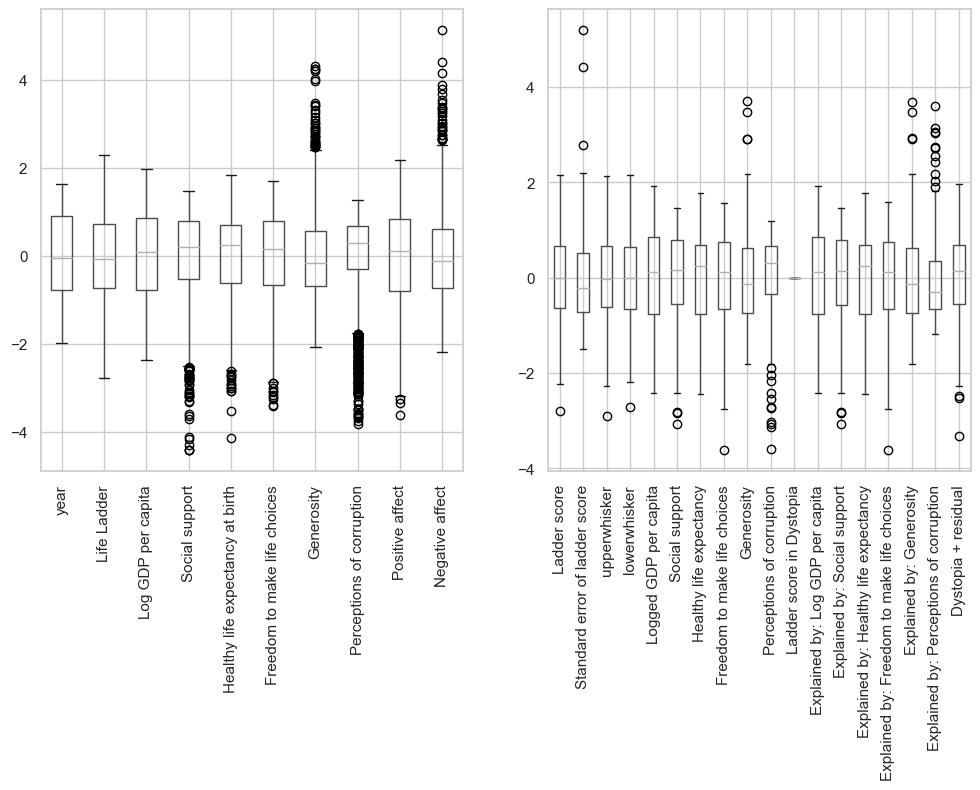

In [11]:
# Preparing visualisation of distributions by normalizing (so that "year" and "Healthy life expectancy at birth" are more comparable to the other variables)
num_df1 = df1.select_dtypes("number")
norm_df1 = (num_df1-num_df1.mean())/num_df1.std()
num_df2 = df2.select_dtypes("number")
norm_df2 = (num_df2-num_df2.mean())/num_df2.std()

# Visualisation of normalized distributions for WHI and WHI2021
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
bx1 = norm_df1.boxplot(ax=ax1)
bx1.set_xticklabels(bx1.get_xticklabels(), rotation=90)
bx2 = norm_df2.boxplot(ax=ax2)
bx2.set_xticklabels(bx2.get_xticklabels(), rotation=90);

# STEP 2: Preparation, Data Visualisation, First Tests

In [12]:
# Create a dictionary of shape {"Country name": "Regional indicator"} for assigning
df_reg = df2[["Country name", "Regional indicator"]].copy()
reg_dict = df_reg.set_index("Country name")["Regional indicator"].to_dict()

# Including and matching regional indicator to WHI dataset
df1_prep = df1.copy()
df1_prep["Regional indicator"] = df1_prep["Country name"].map(reg_dict)

# Preparing WHI 2021 dataset for the right format to include 2021 entries to WHI
df2_prep = df2.copy()
df2_prep["year"] = int(2021)
df2_prep = df2_prep.drop(["Standard error of ladder score", "upperwhisker", "lowerwhisker", "Ladder score in Dystopia", "Explained by: Log GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity", "Explained by: Perceptions of corruption", "Dystopia + residual"], axis=1)
df2_prep = df2_prep.rename(columns={"Ladder score":"Life Ladder", "Logged GDP per capita":"Log GDP per capita", "Healthy life expectancy":"Healthy life expectancy at birth"})

# Concatenating the 2021 entries to WHI dataset
df_merge = pd.concat([df1_prep, df2_prep])
df_merge = df_merge.sort_values(["Country name", "year"]).reset_index()
df_merge = df_merge.drop("index", axis=1)
df_merge.info()

# df_merge will be the central DataFrame that will be worked on from here on!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2098 non-null   object 
 1   year                              2098 non-null   int64  
 2   Life Ladder                       2098 non-null   float64
 3   Log GDP per capita                2062 non-null   float64
 4   Social support                    2085 non-null   float64
 5   Healthy life expectancy at birth  2043 non-null   float64
 6   Freedom to make life choices      2066 non-null   float64
 7   Generosity                        2009 non-null   float64
 8   Perceptions of corruption         1988 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
 11  Regional indicator                2035 non-null   object 
dtypes: flo

In [13]:
# Manually filling in missing regional indicators
missing_regs = {"Trinidad and Tobago":"Latin America and Caribbean", "Guyana":"Latin America and Caribbean", "Cuba":"Latin America and Caribbean", "Suriname":"Latin America and Caribbean", "Belize":"Latin America and Caribbean",
                "Syria":"Middle East and North Africa", "Qatar":"Middle East and North Africa", "Oman":"Middle East and North Africa",
                "Congo (Kinshasa)":"Sub-Saharan Africa", "Djibouti":"Sub-Saharan Africa", "Central African Republic":"Sub-Saharan Africa", "Angola":"Sub-Saharan Africa", "Somalia":"Sub-Saharan Africa", "Somaliland region":"Sub-Saharan Africa", "Sudan":"Sub-Saharan Africa", "South Sudan":"Sub-Saharan Africa",
                "Bhutan":"South Asia"}

# Creating complete regional dictionary
complete_regs = {**reg_dict, **missing_regs}
df_merge["Regional indicator"] = df_merge["Regional indicator"].fillna(df_merge["Country name"].map(complete_regs))

# Dropping 2005, since it only consists of 27 countries and can be considered an "outlier-year"
df_merge = df_merge[(df_merge["year"] != 2005)]
display(df_merge)

# Creating means per country and preparing to plot by regions
means_country = df_merge.groupby(["Country name"]).agg({"Life Ladder":"mean", "Log GDP per capita":"mean", "Social support":"mean", "Healthy life expectancy at birth":"mean", "Freedom to make life choices":"mean", "Generosity":"mean", "Perceptions of corruption":"mean", "Positive affect":"mean", "Negative affect":"mean"})
means_country = means_country.sort_values("Life Ladder", ascending=False)
means_country["Regional indicator"] = means_country.index.map(complete_regs)

# Creating means per region and preparing to plot by regions
means_region = df_merge
means_region["Regional indicator"] = means_region["Country name"].map(complete_regs)
means_region = means_region.groupby(["Regional indicator"]).agg({"Life Ladder":"mean", "Log GDP per capita":"mean", "Social support":"mean", "Healthy life expectancy at birth":"mean", "Freedom to make life choices":"mean", "Generosity":"mean", "Perceptions of corruption":"mean", "Positive affect":"mean", "Negative affect":"mean"})
means_region = means_region.sort_values("Life Ladder", ascending=False)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776,0.710,0.268,South Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
2093,Zimbabwe,2017,3.638,8.016,0.754,55.000,0.753,-0.098,0.751,0.806,0.224,Sub-Saharan Africa
2094,Zimbabwe,2018,3.616,8.049,0.775,55.600,0.763,-0.068,0.844,0.710,0.212,Sub-Saharan Africa
2095,Zimbabwe,2019,2.694,7.950,0.759,56.200,0.632,-0.064,0.831,0.716,0.235,Sub-Saharan Africa
2096,Zimbabwe,2020,3.160,7.829,0.717,56.800,0.643,-0.009,0.789,0.703,0.346,Sub-Saharan Africa


## Repeating description steps for merged DataFrame

In [70]:
# Checking merged dataset for missing values
df_merge_na = df_merge.isna().sum()/len(df_merge)*100
display(df_merge_na)

# Execute for saving as XLSX-file:
#df_merge_na.to_excel("number_of_nas_column.xlsx")

Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  1.738291
Social support                      0.627716
Healthy life expectancy at birth    2.655722
Freedom to make life choices        1.448576
Generosity                          3.042009
Perceptions of corruption           5.214872
Positive affect                     8.208595
Negative affect                     7.918880
Regional indicator                  0.000000
pre_post                            0.000000
dtype: float64

In [15]:
# Show dimensions of original datasets and merged dataset
df_colrows = pd.DataFrame(data={"Number of columns":[len(df1.columns), len(df2.columns), len(df_merge.columns)], "Number of rows":[len(df1), len(df2), len(df_merge)]}, index=["WHR", "2021", "MERGE"])
display(df_colrows)

# Execute for saving as XLSX-file:
#df_colrows.to_excel("number_of_colrows.xlsx")

,Number of columns,Number of rows
WHR,11,1949
2021,20,149
MERGE,12,2071


## Data Visualization

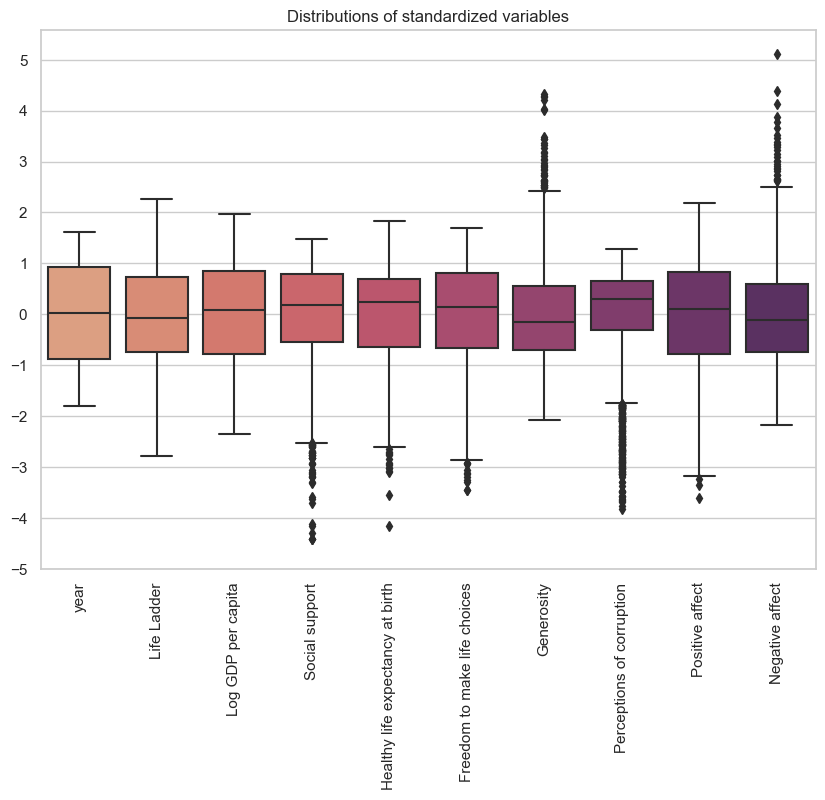

In [16]:
# Selecting numerical variables and standardizing them, in order to show a boxplot with distributions
num_df_merge = df_merge.select_dtypes("number")
norm_df_merge = (num_df_merge-num_df_merge.mean())/num_df_merge.std()

fig, ax = plt.subplots(figsize=(10,7))
plt.title("Distributions of standardized variables")
sns.boxplot(norm_df_merge, palette="flare", )
ax.set_yticks(range(-5,6))
ax.set_xticklabels(bx1.get_xticklabels(), rotation=90);

# Execute for saving boxplot with df_merge distributions:
#plt.tight_layout()
#fig.savefig("distributions_merge.png");

In [17]:
# Show descriptive statistics for df_merge
df_merge_descstats = df_merge.describe().drop("year", axis=1)
display(df_merge_descstats)

# Execute for saving as XLSX-file:
# df_merge_descstats.to_excel("df_merge_descriptive_stats.xlsx")

display(df_merge["Country name"].value_counts())

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2071.000000,2035.000000,2058.000000,2016.000000,2041.000000,2008.000000,1963.000000,1901.000000,1907.000000
mean,5.458693,9.363167,0.811598,63.431241,0.745073,-0.001155,0.746030,0.709475,0.268718
std,1.109517,1.156030,0.118196,7.489589,0.140857,0.161339,0.186119,0.107249,0.085415
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,4.640000,8.460000,0.748000,58.695000,0.651000,-0.115000,0.690000,0.625000,0.206000
50%,5.385000,9.458000,0.833000,65.222500,0.766000,-0.027000,0.801000,0.721000,0.259000
75%,6.261000,10.347000,0.904750,68.600000,0.858000,0.089000,0.869000,0.799000,0.320000
max,7.971000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


Country name
Zimbabwe    16
Ukraine     16
China       16
Colombia    16
Uganda      16
            ..
Maldives     2
Suriname     1
Guyana       1
Cuba         1
Oman         1
Name: count, Length: 166, dtype: int64

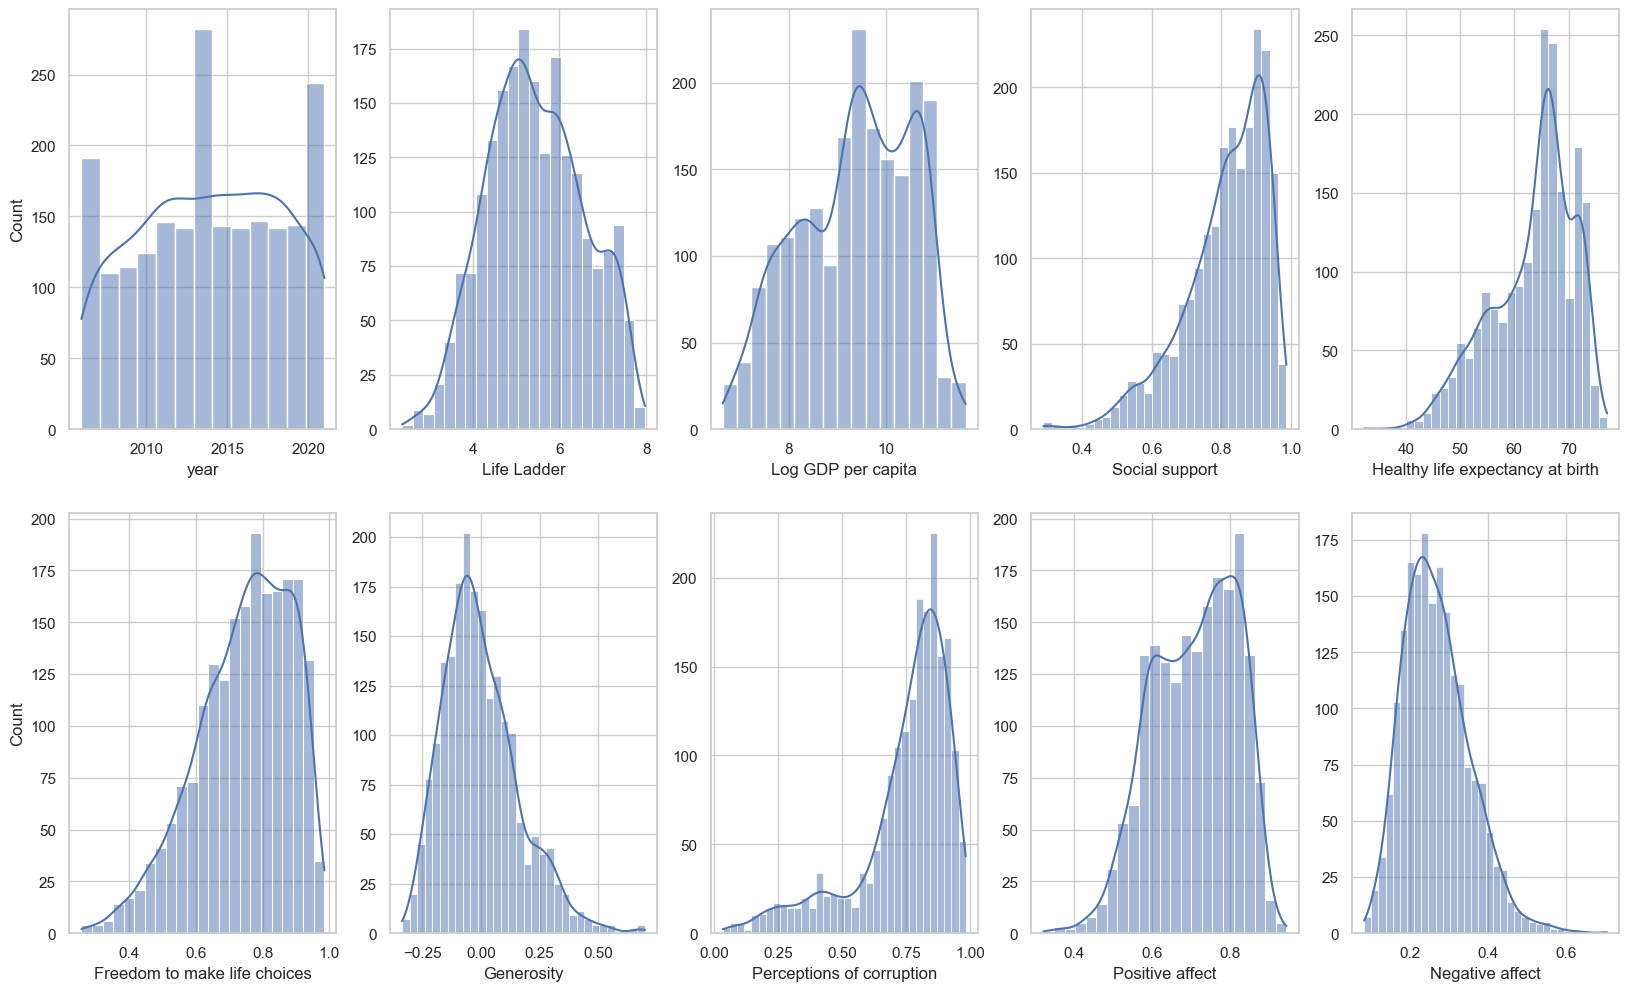

In [18]:
# Showing distributions for all variables per histogram
df_hist = df_merge.select_dtypes("number")

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,12))

sns.histplot(x=df_hist["year"], kde=True, ax=axes[0,0])
axes[0,0].set_xlabel("year")
sns.histplot(x=df_hist["Life Ladder"], kde=True, ax=axes[0,1])
axes[0,1].set_xlabel("Life Ladder")
axes[0,1].set_ylabel("")
sns.histplot(x=df_hist["Log GDP per capita"], kde=True, ax=axes[0,2])
axes[0,2].set_xlabel("Log GDP per capita")
axes[0,2].set_ylabel("")
sns.histplot(x=df_hist["Social support"], kde=True, ax=axes[0,3])
axes[0,3].set_xlabel("Social support")
axes[0,3].set_ylabel("")
sns.histplot(x=df_hist["Healthy life expectancy at birth"], kde=True, ax=axes[0,4])
axes[0,4].set_xlabel("Healthy life expectancy at birth")
axes[0,4].set_ylabel("")
sns.histplot(x=df_hist["Freedom to make life choices"], kde=True, ax=axes[1,0])
axes[1,0].set_xlabel("Freedom to make life choices")
sns.histplot(x=df_hist["Generosity"], kde=True, ax=axes[1,1])
axes[1,1].set_xlabel("Generosity")
axes[1,1].set_ylabel("")
sns.histplot(x=df_hist["Perceptions of corruption"], kde=True, ax=axes[1,2])
axes[1,2].set_xlabel("Perceptions of corruption")
axes[1,2].set_ylabel("")
sns.histplot(x=df_hist["Positive affect"], kde=True, ax=axes[1,3])
axes[1,3].set_xlabel("Positive affect")
axes[1,3].set_ylabel("")
sns.histplot(x=df_hist["Negative affect"], kde=True, ax=axes[1,4])
axes[1,4].set_xlabel("Negative affect")
axes[1,4].set_ylabel("");

# Execute for saving correlation matrix for df_merge:
#plt.tight_layout()
#fig.savefig("hist_distributions_merge.png");

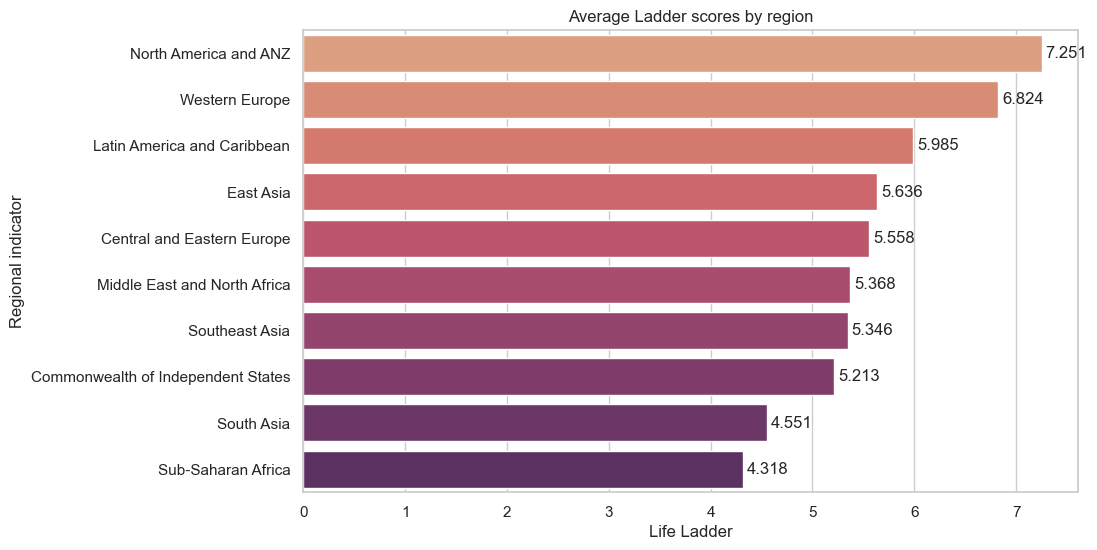

In [19]:
# 1. Life ladder averages by region
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Average Ladder scores by region")

sns.barplot(x=means_region["Life Ladder"], y=means_region.index, palette="flare");
sns.set_style("whitegrid")
ax.bar_label(ax.containers[0], fmt="%.3f", padding=3);

# Execute for saving life ladder by region:
#plt.tight_layout()
#fig.savefig("life_ladder_region.png")

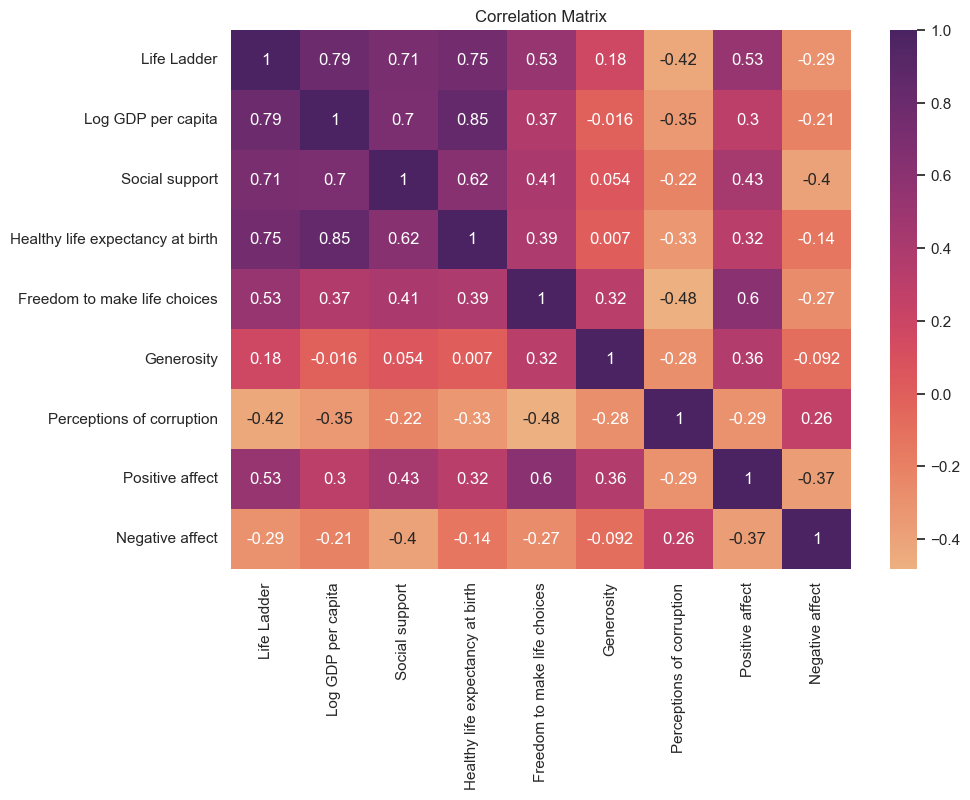

In [20]:
# 2. What Key Figures are correlated to Life Ladder and each other?
fig, ax = plt.subplots(figsize=(10,7))
plt.title("Correlation Matrix")

cor = df_merge.iloc[:,2:11].corr()
sns.heatmap(cor, annot=True, ax=ax, cmap="flare");

# Execute for saving correlation matrix for df_merge:
#plt.tight_layout()
#fig.savefig("correlations_merge.png");

Life Ladder
year Regional indicator                             
2020 Central and Eastern Europe             6.076688
     Commonwealth of Independent States     5.641571
     East Asia                              5.956500
     Latin America and Caribbean            5.660182
     Middle East and North Africa           5.363455
     North America and ANZ                  7.111750
     South Asia                             4.752500
     Southeast Asia                         5.011400
     Sub-Saharan Africa                     4.761571
     Western Europe                         6.919421
2021 Central and Eastern Europe             5.984765
     Commonwealth of Independent States     5.467000
     East Asia                              5.810333
     Latin America and Caribbean            5.908050
     Middle East and North Africa           5.219765
     North America and ANZ                  7.128500
     South Asia                             4.441857
     Southeast Asia                         5.407556
     Sub-Saharan Africa                     4.494472
     Western Europe                         6.914905

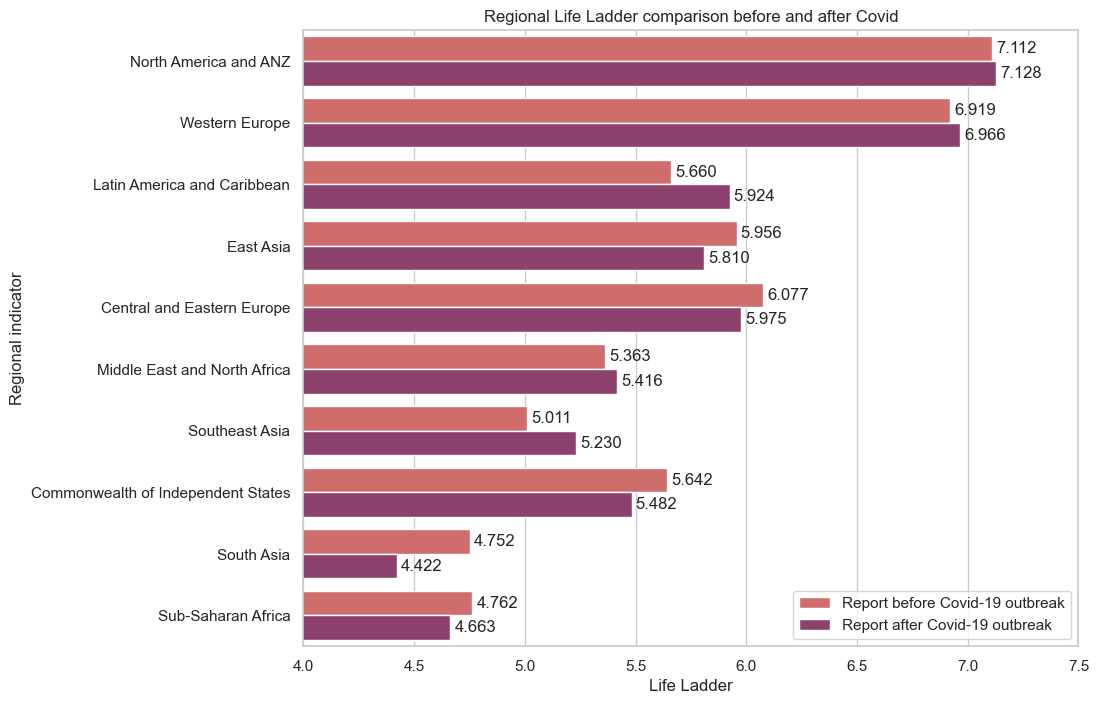

In [21]:
# Assign 2020 with "pre" and 2021 with "post", assigning all prior reports with "none"
# Note: the report from 2020 was released before the first lockdowns, possible effects are therefore only visible beginning in 2021.
pre_post = df_merge
pre_post["pre_post"] = pre_post["year"].replace({2005: "none", 2006: "none", 2007: "none", 2008: "none", 2009: "none", 2010: "none", 2011: "none", 2012: "none", 2013: "none", 2014: "none", 2015: "none", 2016: "none", 2017: "none", 2018: "none", 2019: "none", 2020: "pre", 2021: "post"})
pre_post = pre_post[(pre_post["pre_post"] == "pre") | (pre_post["pre_post"] == "post")]

# Check for countries, that were available in the year pre/post covid only
exclusion = pd.DataFrame(pre_post["Country name"].value_counts() == 2)
exclusion = exclusion.loc[exclusion["count"] == True]
inclusion = pre_post.loc[pre_post["Country name"].isin(exclusion.index)]

# 3. Can we see a pre- and post-covid effect?
fig, ax = plt.subplots(figsize=(10,8))

hue_order = ["pre", "post"]
sns.barplot(x=inclusion["Life Ladder"], y=inclusion["Regional indicator"], hue=inclusion["pre_post"], hue_order=hue_order, order=means_region.index, errorbar=None, palette="flare")
sns.set_style("whitegrid")
ax.set_xlim([4,7.5])
ax.legend(loc="lower right", labels=["Report before Covid-19 outbreak", "Report after Covid-19 outbreak"])
ax.set_title("Regional Life Ladder comparison before and after Covid")
ax.bar_label(ax.containers[0], fmt="%.3f", padding=3)
ax.bar_label(ax.containers[1], fmt="%.3f", padding=3);

# Checking Life Ladder for regions before and after the outbreak
display(pre_post.groupby(["year", "Regional indicator"]).agg({"Life Ladder":"mean"}))

# Execute for saving life ladder by region pre and post covid:
#plt.tight_layout()
#fig.savefig("life_ladder_regio_covid.png");

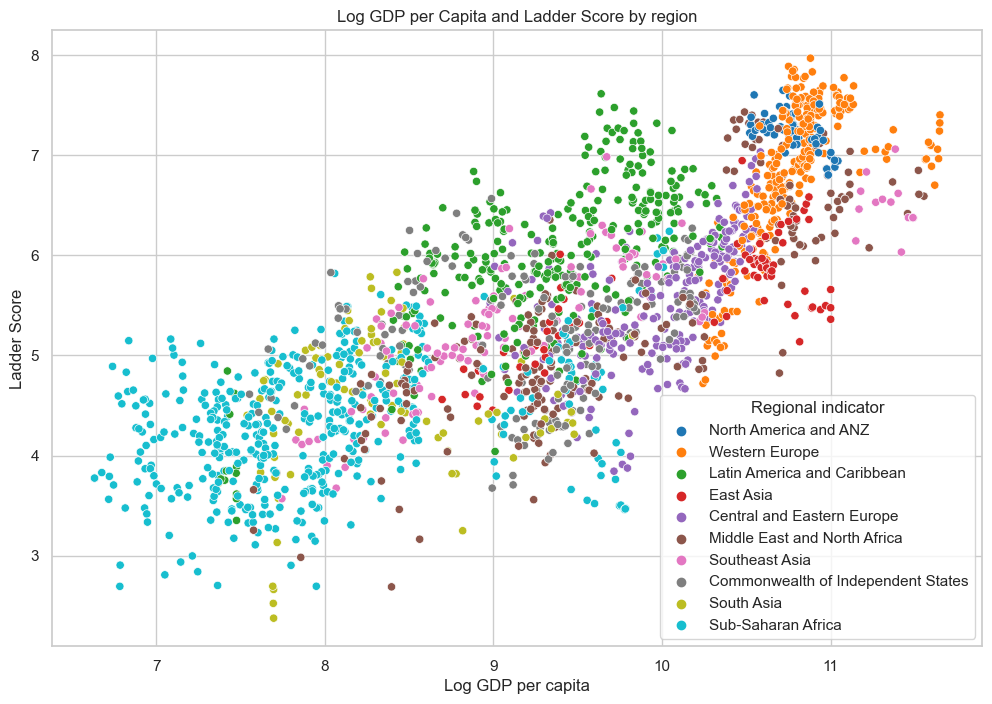

In [22]:
# 4. Show Scatterplot of Life Ladder and GDP by region
fig, ax = plt.subplots(figsize=(12,8))

hue_order = ["North America and ANZ", "Western Europe", "Latin America and Caribbean", "East Asia", "Central and Eastern Europe", "Middle East and North Africa", "Southeast Asia", "Commonwealth of Independent States", "South Asia", "Sub-Saharan Africa"]
sns.scatterplot(x='Log GDP per capita', y='Life Ladder', data=df_merge, palette="tab10", hue='Regional indicator', hue_order=hue_order)
sns.set_style("whitegrid")
plt.title('Log GDP per Capita and Ladder Score by region')
plt.xlabel('Log GDP per capita')
plt.ylabel('Ladder Score');

# Execute for saving life ladder score and GDP by region:
#plt.tight_layout()
#fig.savefig("life_ladder_gdp_regio.png");

Countries available in all 10 last years: 40
Countries available in all 5 last years: 47 



year
2021    149
2017    147
2011    146
2014    145
2019    144
2015    143
2012    142
2016    142
2018    142
2013    137
2010    124
2009    114
2008    110
2007    102
2020     95
2006     89
Name: count, dtype: int64

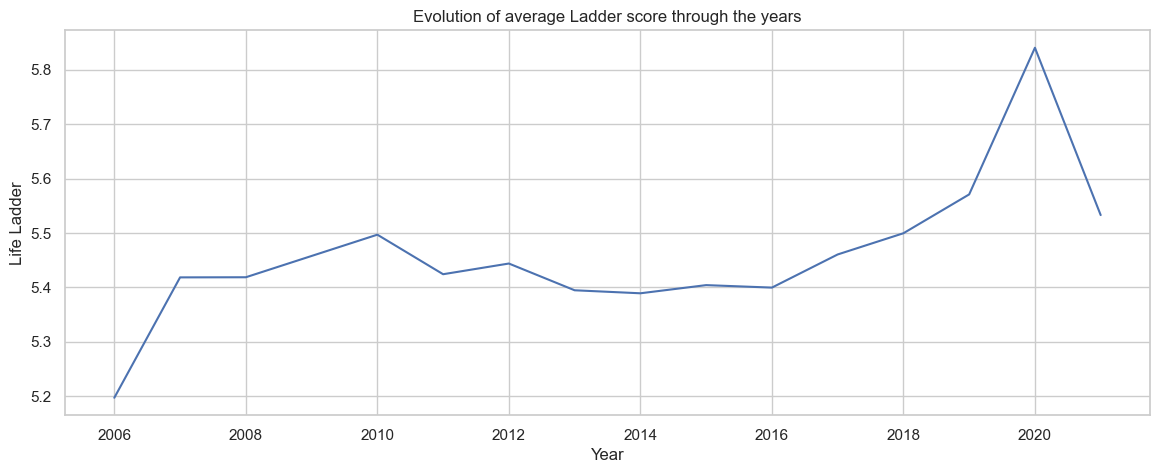

In [23]:
# When trying to display the evolution of Life Ladder over the years, one have to keep in mind that each year the number of available countries differs.
# In the following, a try for estimating a fairer comparison between years was examined.

# Check for countries, that were available in all last 5 or 10 years only
year10_mask = df_merge.loc[df_merge["year"] > 2010]
exclusion2 = pd.DataFrame(year10_mask["Country name"].value_counts() == 10)
exclusion2 = exclusion2.loc[exclusion2["count"] == True]
inclusion2 = year10_mask.loc[year10_mask["Country name"].isin(exclusion2.index)]
print("Countries available in all 10 last years:", inclusion2["Country name"].value_counts().count())

year5_mask = df_merge.loc[df_merge["year"] > 2015]
exclusion3 = pd.DataFrame(year5_mask["Country name"].value_counts() == 5)
exclusion3 = exclusion3.loc[exclusion3["count"] == True]
inclusion3 = year5_mask.loc[year5_mask["Country name"].isin(exclusion3.index)]
print("Countries available in all 5 last years:", inclusion3["Country name"].value_counts().count(),"\n")

# 5. Display evolution of Life Ladder over the years
average_life_ladder = df_merge.groupby("year")["Life Ladder"].mean().reset_index()

fig, ax = plt.subplots(figsize=(14,5))

sns.lineplot(data=average_life_ladder, x="year", y="Life Ladder", errorbar=None)
sns.set_style("whitegrid")
plt.title("Evolution of average Ladder score through the years")
plt.xlabel("Year")
plt.ylabel("Life Ladder");

# How many countries were available in each year?
display(df_merge["year"].value_counts())

# Execute for saving evolution of life ladder over the years:
#plt.tight_layout()
#fig.savefig("life_ladder_years.png");

## Statistical Testing

In [24]:
# Import more relevant packages / libraries
from scipy.stats import pearsonr
import statsmodels.api

In [25]:
### 1. ANOVA: Regional indicator -> Life Ladder ###

# H0: The regional indicator does not have an effect on the Life Ladder score
# H1: The regional indicator does have an effect on the Life Ladder score

df_anova = df_merge.rename(columns={"Life Ladder": "Life_Ladder", "Regional indicator":"Regional_indicator", "Log GDP per capita":"Log_GDP_per_capita", "Social support":"Social_support", "Freedom to make life choices":"Freedom_to_make_life_choices"})
df_anova_cov = df_anova[(df_anova["pre_post"] != "none")]

result1 = statsmodels.formula.api.ols('Life_Ladder ~ Regional_indicator', data=df_anova).fit()
table1 = statsmodels.api.stats.anova_lm(result1)
display(table1)

# Conclusion: The p-value here is less than 5%, which is why we can reject H0 and assume H1.
# There is a significant effect of the regional indicator on the Life Ladder score.


### 2. ANOVA: Pre/Post Covid -> Life Ladder ###

# H0: Being before or after Covid does not have an effect on the Life Ladder score
# H1: Being before or after Covid does have an effect on the Life Ladder score

result2 = statsmodels.formula.api.ols('Life_Ladder ~ pre_post', data=df_anova_cov).fit()
table2 = statsmodels.api.stats.anova_lm(result2)
display(table2)

# Conclusion: The p-value here is less than 5%, which is why we can reject H0 and assume H1.
# There is a significant effect of being prior to or after Covid on the Life Ladder score!


### 3. ANOVA: Regional indicator -> Log GDP per capita ###

# H0: The regional indicator does not have an effect on logged GDP per capita
# H1: The regional indicator does have an effect on logged GDP per capita

result3 = statsmodels.formula.api.ols('Log_GDP_per_capita ~ Regional_indicator', data=df_anova).fit()
table3 = statsmodels.api.stats.anova_lm(result3)
display(table3)

# Conclusion: The p-value here is less than 5%, which is why we can reject H0 and assume H1.
# There is a significant effect of the regional indicator on the logged GDP per capita!

### 4. ANOVA: Pre/Post Covid -> Social Support ###

# H0: Being before or after Covid does not have an effect on the social support
# H1: Being before or after Covid does not have an effect on the social support

result4 = statsmodels.formula.api.ols('Social_support ~ pre_post', data=df_anova_cov).fit()
table4 = statsmodels.api.stats.anova_lm(result4)
display(table4)

# Conclusion: The p-value here is above 5%, which is why we cannot reject H0.
# There is no significant effect of being prior to or after Covid on the social support!

,df,sum_sq,mean_sq,F,PR(>F)
Regional_indicator,9.0,1501.649690,166.849966,328.573814,0.0
Residual,2061.0,1046.576947,0.507801,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
pre_post,1.0,5.494744,5.494744,5.100381,0.024812
Residual,242.0,260.711473,1.077320,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
Regional_indicator,9.0,1818.358542,202.039838,454.644628,0.0
Residual,2025.0,899.891138,0.444391,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
pre_post,1.0,0.033892,0.033892,2.731273,0.099698
Residual,242.0,3.002986,0.012409,NaN,NaN


In [26]:
### 5. Pearson-Correlation: Generosity -> Life Ladder ###

# H0: Generosity and Life Ladder are correlated
# H1: Generosity and Life Ladder are not correlated

df_corr = df_merge.dropna(axis=0)

print("p-value: ", pearsonr(x = df_corr["Life Ladder"], y = df_corr["Generosity"])[1])
print("coefficient: ", pearsonr(x = df_corr["Life Ladder"], y = df_corr["Generosity"])[0])

# Conclusion: The p-value here is less than 5%, which is why we can reject H0 and assume H1.
# There is a significant  correlation between Generosity and Life Ladder score with a (weak) coefficient of 0.18!

p-value:  4.2307846533284103e-14
coefficient:  0.18144141161880656


# STEP 3: Cleaning and Pre-processing

In [27]:
# Import more relevant packages / libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [28]:
# Splitting df_merge into a training set and a test set
feats = df_merge.drop(["Country name", "year", "Life Ladder"], axis=1)
target = df_merge["Life Ladder"]

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25)

# Defining numerical and categorical features
num_train = X_train[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect"]]
num_test = X_test[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect"]]

cat_train = X_train[["Regional indicator", "pre_post"]]
cat_test = X_test[["Regional indicator", "pre_post"]]

# Showing value counts for identifying column names after OneHotEncoding
display(X_train["Regional indicator"].value_counts())
display(X_train["pre_post"].value_counts())

Regional indicator
Sub-Saharan Africa                    351
Latin America and Caribbean           234
Western Europe                        208
Central and Eastern Europe            178
Middle East and North Africa          171
Commonwealth of Independent States    140
Southeast Asia                         93
South Asia                             75
East Asia                              59
North America and ANZ                  44
Name: count, dtype: int64

pre_post
none    1367
post     114
pre       72
Name: count, dtype: int64

In [29]:
# Imputing missing values with SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
num_train = imputer.fit_transform(num_train)
num_test = imputer.transform(num_test)

In [30]:
# Normalize the numerical features
scaler = MinMaxScaler()
num_train = scaler.fit_transform(num_train)
num_test = scaler.transform(num_test)

In [31]:
# Encode categorical features
ohe = OneHotEncoder(drop="first", sparse_output=False)
cat_train = ohe.fit_transform(cat_train)
cat_test = ohe.transform(cat_test)

In [32]:
# Reunite the datasets and check for correct pre-processing
X_train = pd.DataFrame(np.concatenate([num_train, cat_train], axis=1))
X_test = pd.DataFrame(np.concatenate((num_test, cat_test), axis=1))

# STEP 4: Data Analysis - Multidimensional visualization

In [33]:
# Import more relevant packages / libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
# Preparations for using the PCA
df_pca = df_merge.drop(["Country name", "year", "Life Ladder", "Regional indicator", "pre_post"], axis=1)
# Standardize the data and impute missing values for PCA
std_scaler = StandardScaler()
z_pca = std_scaler.fit_transform(df_pca)
z_pca = imputer.fit_transform(z_pca)

# Conducting the PCA
pca = PCA()
coord_pca = pca.fit_transform(z_pca)

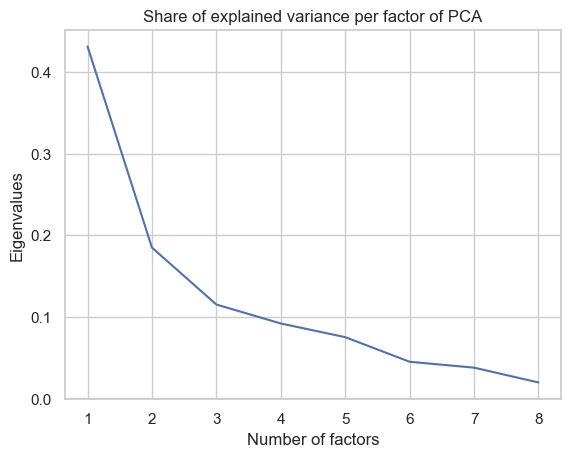

In [35]:
# Display the explained variance per factor of PCA (Scree plot)
plt.plot(range(1, len(df_pca.columns)+1), pca.explained_variance_ratio_)
plt.xlabel("Number of factors")
plt.ylabel("Eigenvalues")
plt.title("Share of explained variance per factor of PCA")
plt.show();

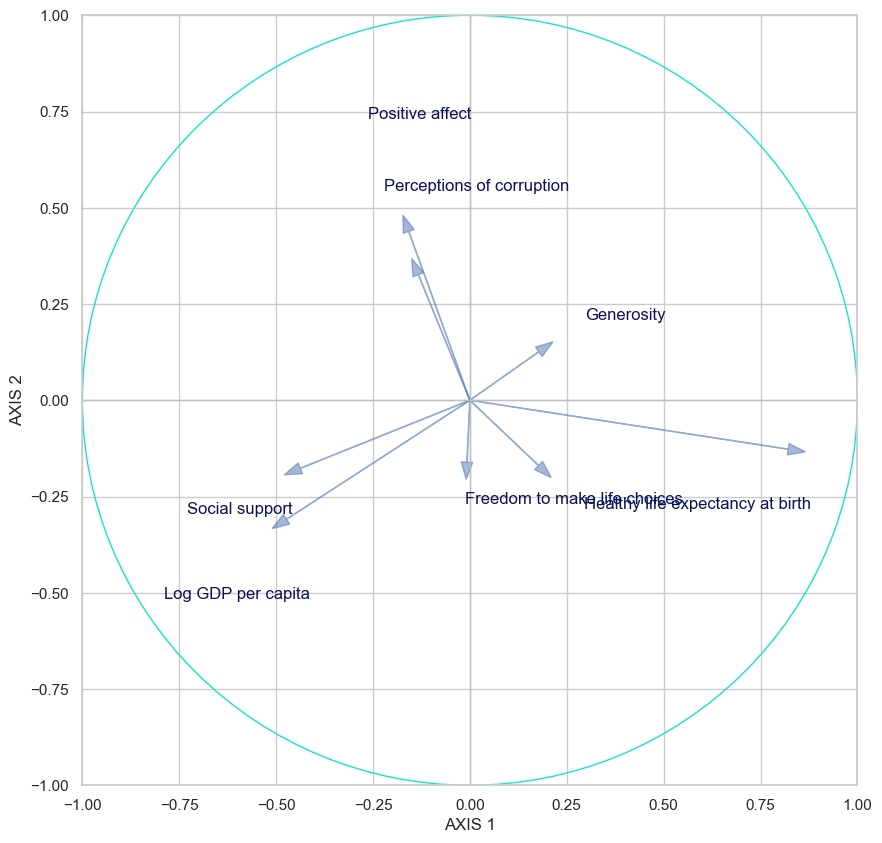

In [36]:
# Display the correlation circle
root_eigenvalues = np.sqrt(pca.explained_variance_)
corvar = np.zeros((len(df_pca.columns), len(df_pca.columns)))
for k in range(len(df_pca.columns)):
    corvar[:, k] = pca.components_[:, k] * root_eigenvalues[k]

# Delimitation 
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Displaying variables
for j in range(len(df_pca.columns)):
    plt.annotate(df_pca.columns[j], (corvar[j, 0], corvar[j, 1]), color="#091158")
    plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6,
              alpha=0.5, head_width=0.03, color="b")

# Adding Axis
plt.plot([-1, 1], [0, 0], color="silver", linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color="silver", linestyle='-', linewidth=1)

# Circle and labels
cercle = plt.Circle((0, 0), 1, color="#16E4CA", fill=False)
axes.add_artist(cercle)
plt.xlabel("AXIS 1")
plt.ylabel("AXIS 2")
plt.show();

# STEP 4.1: Development of first model iterations

## LINEAR REGRESSION

In [37]:
# Import more relevant packages / libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
# Conduct first linear regression modelling
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Saving regression predictions on test set
pred_test = regressor.predict(X_test)

# Show coefficient of determination for train and test data
print("R² for train data:", regressor.score(X_train, y_train))
print("R² for test data:", regressor.score(X_test, y_test))

# Show performance metrics MAE, MSE, RMSE
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_test)
print("Mean Squared Error:", mse, "\nRoot Mean Squared Error:", rmse, "\nMean Absolute Error:", mae)

# R² shows an acceptable representation of .78 (training set) and .80 (test set). We do not see indications of overfitting.

R² for train data: 0.7928923448523677
R² for test data: 0.7780948400107341
Mean Squared Error: 0.2767729151999928 
Root Mean Squared Error: 0.5260921166487793 
Mean Absolute Error: 0.391468137413638


,Estimated value
Intercept,2.922460
Log GDP per capita,1.851085
Social support,0.936117
Healthy life expectancy at birth,0.358855
Freedom to make life choices,0.659068
Generosity,0.485868
Perceptions of corruption,-0.296957
Positive affect,0.649662
Negative affect,-0.646530
Commonwealth of Independent States,-0.098854


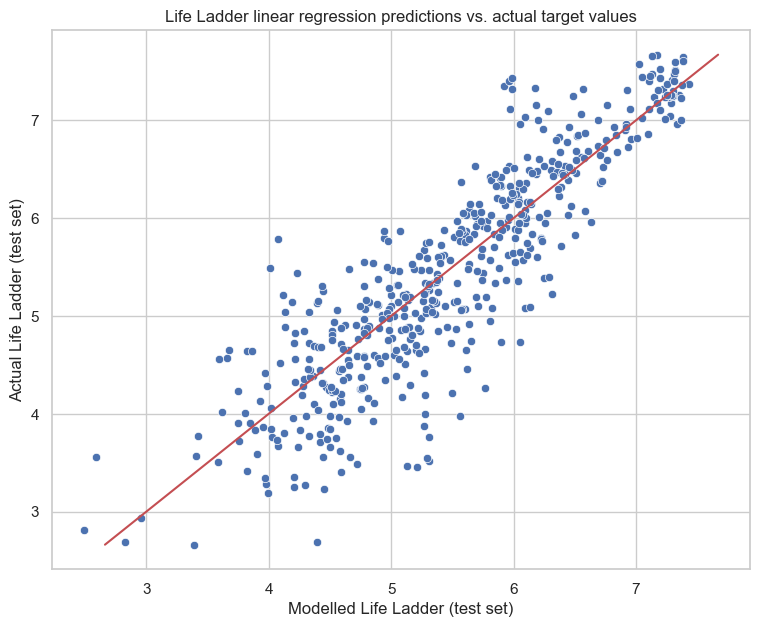

In [39]:
# Display the intercept and estimated coefficients of each variable
coeffs = list(regressor.coef_)
coeffs.insert(0, regressor.intercept_)

reg_feats = ["Intercept", "Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect",
             "Commonwealth of Independent States" , "East Asia", "Latin America and Caribbean", "Middle East and North Africa", "North America and ANZ", "South Asia", "Southeast Asia", "Sub-Saharan Africa", "Western Europe", "post", "pre"]

reg_coefficients = pd.DataFrame({'Estimated value': coeffs}, index=reg_feats)
display(reg_coefficients)

# Comparing model predictions with real target values
fig, ax = plt.subplots(figsize=(9,7))
sns.set_style("darkgrid")
plt.title("Life Ladder linear regression predictions vs. actual target values")
plt.xlabel("Modelled Life Ladder (test set)")
plt.ylabel("Actual Life Ladder (test set)")
sns.scatterplot(x=pred_test, y=y_test)
sns.lineplot(x=(y_test.min(), y_test.max()), y=(y_test.min(), y_test.max()), color="r");

# Execute for saving life ladder predictions versus actual values:
#plt.tight_layout()
#fig.savefig("scatterplot_reg_predicted_01.png");

## DECISION TREE

In [40]:
# Import more relevant packages / libraries
from sklearn.tree import DecisionTreeRegressor

In [41]:
# Conduct first decision tree regression modelling
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Saving decision tree regression predictions on test set
y_pred_dt = dt_regressor.predict(X_test)

# Show coefficient of determination for train and test data
print("R² for train data:", dt_regressor.score(X_train, y_train))
print("R² for test data:", dt_regressor.score(X_test, y_test))

# Show performance metrics MAE, MSE, RMSE
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print("Mean Squared Error:", mse_dt, "\nRoot Mean Squared Error:", rmse_dt, "\nMean Absolute Error:", mae_dt)

R² for train data: 1.0
R² for test data: 0.7626196790484396
Mean Squared Error: 0.29607442857142857 
Root Mean Squared Error: 0.5441272172676428 
Mean Absolute Error: 0.4023590733590734


,Importance
Log GDP per capita,5.814622e-01
Healthy life expectancy at birth,1.427621e-01
Social support,6.166414e-02
Latin America and Caribbean,5.613690e-02
Freedom to make life choices,3.768068e-02
Negative affect,2.720556e-02
Positive affect,2.714219e-02
Perceptions of corruption,2.545907e-02
Generosity,2.145308e-02
East Asia,7.317720e-03


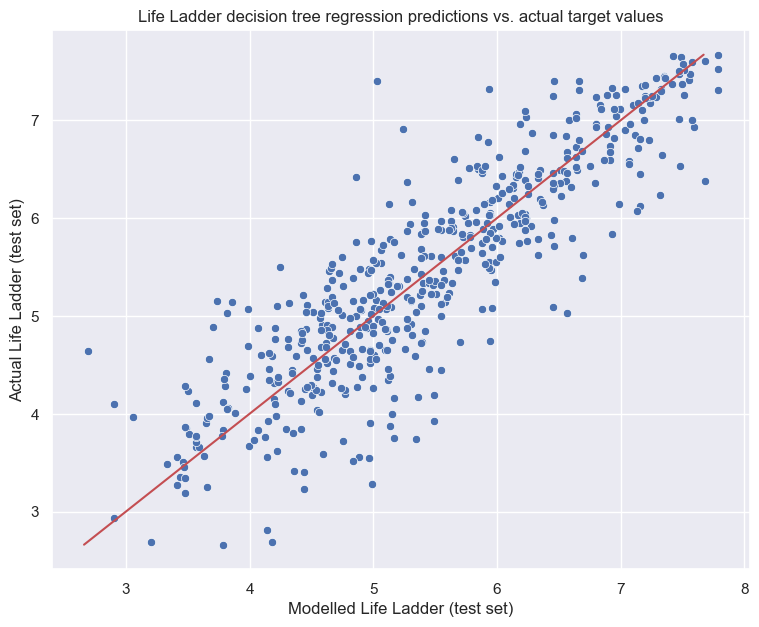

In [42]:
# Display the estimated importance of each feature
dt_feat_importances = pd.DataFrame(dt_regressor.feature_importances_, columns=["Importance"])
dt_feat_importances.rename(index={0:"Log GDP per capita", 1:"Social support", 2:"Healthy life expectancy at birth", 3:"Freedom to make life choices", 4:"Generosity", 5:"Perceptions of corruption", 6:"Positive affect", 7:"Negative affect",
             8:"Commonwealth of Independent States" , 9:"East Asia", 10:"Latin America and Caribbean", 11:"Middle East and North Africa", 12:"North America and ANZ", 13:"South Asia", 14:"Southeast Asia", 15:"Sub-Saharan Africa", 16:"Western Europe", 17:"post", 18:"pre"}, inplace=True)
dt_feat_importances.sort_values(by="Importance", ascending=False, inplace=True)
display(dt_feat_importances)

# Comparing model predictions with real target values
fig, ax = plt.subplots(figsize=(9,7))
sns.set_style("darkgrid")
plt.title("Life Ladder decision tree regression predictions vs. actual target values")
plt.xlabel("Modelled Life Ladder (test set)")
plt.ylabel("Actual Life Ladder (test set)")
sns.scatterplot(x=y_pred_dt, y=y_test)
sns.lineplot(x=(y_test.min(), y_test.max()), y=(y_test.min(), y_test.max()), color="r");

# Execute for saving life ladder predictions versus actual values:
#plt.tight_layout()
#fig.savefig("scatterplot_dtreg_predicted_01.png");

## RANDOM FOREST

In [43]:
# Import more relevant packages / libraries
from sklearn.ensemble import RandomForestRegressor

In [44]:
# Conduct first random forest regression modelling
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42)
rf_regressor.fit(X_train, y_train)

# Saving random forest regression predictions on test set
y_pred_rf = rf_regressor.predict(X_test)

# Show coefficient of determination for train and test data
print("R² for train data:", rf_regressor.score(X_train, y_train))
print("R² for test data:", rf_regressor.score(X_test, y_test))

# Show performance metrics MAE, MSE, RMSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Mean Squared Error:", mse_rf, "\nRoot Mean Squared Error:", rmse_rf, "\nMean Absolute Error:", mae_rf)

R² for train data: 0.8629256403490656
R² for test data: 0.8343583107044538
Mean Squared Error: 0.20659786923024878 
Root Mean Squared Error: 0.45453038317614014 
Mean Absolute Error: 0.3466647675709413


,Importance
Log GDP per capita,0.627331
Healthy life expectancy at birth,0.181492
Positive affect,0.047742
Social support,0.045051
Latin America and Caribbean,0.044934
Freedom to make life choices,0.019669
Perceptions of corruption,0.009428
Negative affect,0.007325
East Asia,0.006452
Generosity,0.005474


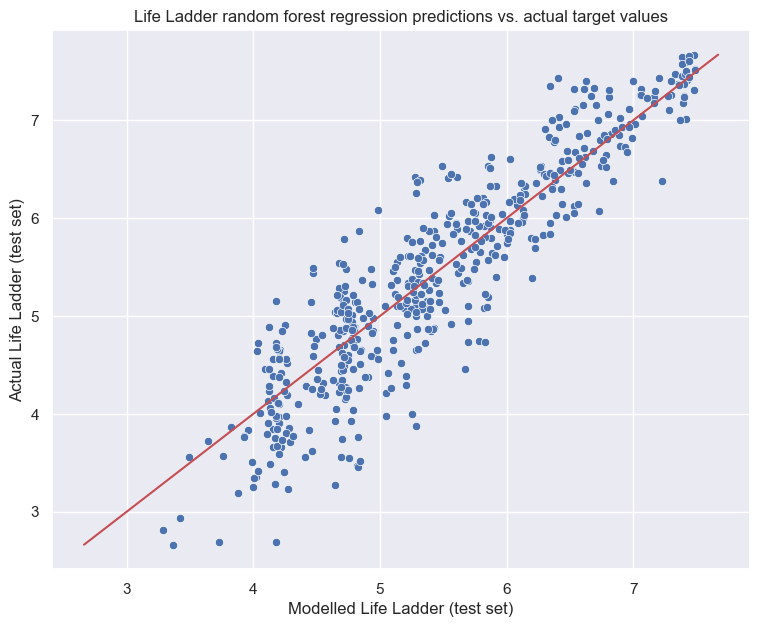

In [45]:
# Display the estimated importance of each feature
rf_feat_importances = pd.DataFrame(rf_regressor.feature_importances_, columns=["Importance"])
rf_feat_importances.rename(index={0:"Log GDP per capita", 1:"Social support", 2:"Healthy life expectancy at birth", 3:"Freedom to make life choices", 4:"Generosity", 5:"Perceptions of corruption", 6:"Positive affect", 7:"Negative affect",
             8:"Commonwealth of Independent States" , 9:"East Asia", 10:"Latin America and Caribbean", 11:"Middle East and North Africa", 12:"North America and ANZ", 13:"South Asia", 14:"Southeast Asia", 15:"Sub-Saharan Africa", 16:"Western Europe", 17:"post", 18:"pre"}, inplace=True)
rf_feat_importances.sort_values(by="Importance", ascending=False, inplace=True)
display(rf_feat_importances)

# Comparing model predictions with real target values
fig, ax = plt.subplots(figsize=(9,7))
sns.set_style("darkgrid")
plt.title("Life Ladder random forest regression predictions vs. actual target values")
plt.xlabel("Modelled Life Ladder (test set)")
plt.ylabel("Actual Life Ladder (test set)")
sns.scatterplot(x=y_pred_rf, y=y_test)
sns.lineplot(x=(y_test.min(), y_test.max()), y=(y_test.min(), y_test.max()), color="r");

# Execute for saving life ladder predictions versus actual values:
#plt.tight_layout()
#fig.savefig("scatterplot_rfreg_predicted_01.png");

## XGBOOST

In [46]:
# Import more relevant packages / libraries
from xgboost import XGBRegressor

In [47]:
# Conduct first XGBoost regression modelling
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)

# Saving XGBoost regression predictions on test set
y_pred_xgb = xgb_reg.predict(X_test)

# Show coefficient of determination for train and test data
print("R² for train data:", xgb_reg.score(X_train, y_train))
print("R² for test data:", xgb_reg.score(X_test, y_test))

# Show performance metrics MAE, MSE, RMSE
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("Mean Squared Error:", mse_xgb, "\nRoot Mean Squared Error:", rmse_xgb, "\nMean Absolute Error:", mae_xgb)

R² for train data: 0.9986058341813181
R² for test data: 0.8731188255723343
Mean Squared Error: 0.15825351935053042 
Root Mean Squared Error: 0.39781090903911925 
Mean Absolute Error: 0.2984882018409641


,Importance
Latin America and Caribbean,0.380577
East Asia,0.152888
Log GDP per capita,0.141493
Healthy life expectancy at birth,0.084154
South Asia,0.067224
Social support,0.030588
Sub-Saharan Africa,0.028695
Positive affect,0.017282
Middle East and North Africa,0.016107
Western Europe,0.013127


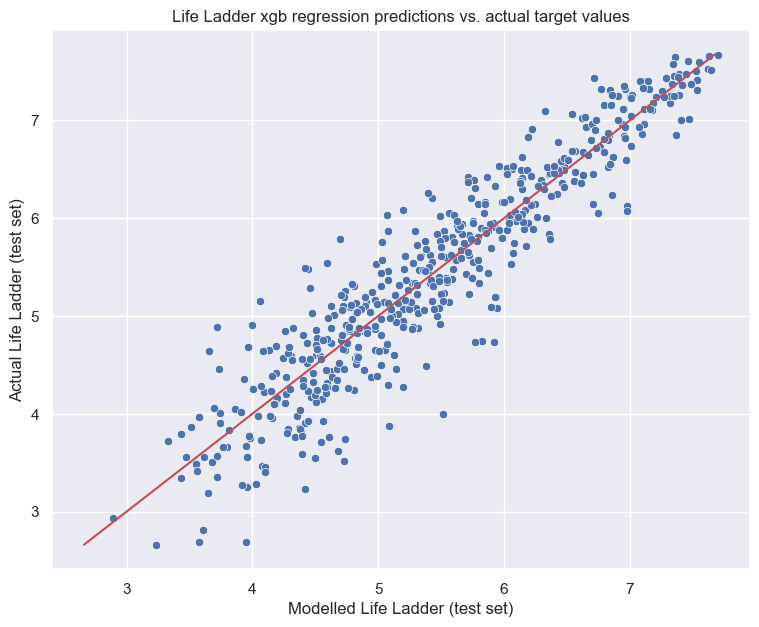

In [48]:
# Display the estimated importance for each feature
xgb_feat_importances = pd.DataFrame(xgb_reg.feature_importances_, columns=["Importance"])
xgb_feat_importances.rename(index={0:"Log GDP per capita", 1:"Social support", 2:"Healthy life expectancy at birth", 3:"Freedom to make life choices", 4:"Generosity", 5:"Perceptions of corruption", 6:"Positive affect", 7:"Negative affect",
             8:"Commonwealth of Independent States" , 9:"East Asia", 10:"Latin America and Caribbean", 11:"Middle East and North Africa", 12:"North America and ANZ", 13:"South Asia", 14:"Southeast Asia", 15:"Sub-Saharan Africa", 16:"Western Europe", 17:"post", 18:"pre"}, inplace=True)
xgb_feat_importances.sort_values(by="Importance", ascending=False, inplace=True)
display(xgb_feat_importances)

# Comparing model predictions with real target values
fig, ax = plt.subplots(figsize=(9,7))
sns.set_style("darkgrid")
plt.title("Life Ladder xgb regression predictions vs. actual target values")
plt.xlabel("Modelled Life Ladder (test set)")
plt.ylabel("Actual Life Ladder (test set)")
sns.scatterplot(x=y_pred_xgb, y=y_test)
sns.lineplot(x=(y_test.min(), y_test.max()), y=(y_test.min(), y_test.max()), color="r");

# Execute for saving life ladder predictions versus actual values:
#plt.tight_layout()
#fig.savefig("scatterplot_xgbreg_predicted_01.png");

# STEP 4.2: Model interpretation and optimization

## LINEAR REGRESSION

In [49]:
# Import more relevant packages / libraries
import shap

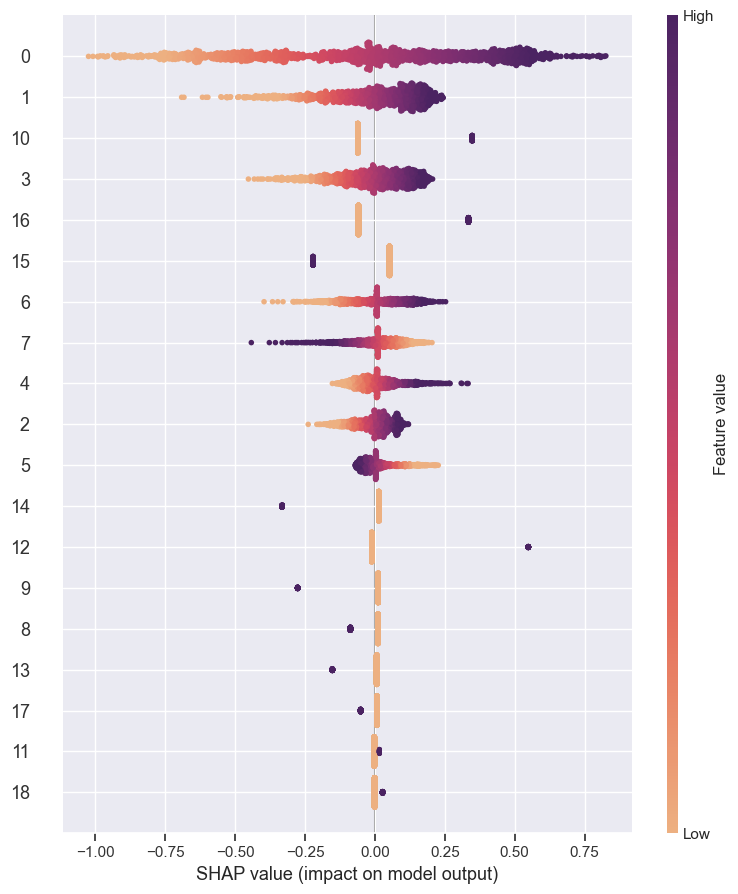

In [50]:
# Use SHAP technique to further investigate the feature importance for the regression
explainer_regressor = shap.LinearExplainer(regressor, X_train)
shap_values_regressor = explainer_regressor.shap_values(X_train)

sample_idx = 0
shap.initjs()
shap.force_plot(explainer_regressor.expected_value, shap_values_regressor[sample_idx, :], X_train.iloc[sample_idx, :])

# Visualize the shap scores results
fig, ax = plt.subplots(figsize=(10, 7))
shap.summary_plot(shap_values_regressor, X_train, cmap="flare");

# Execute for saving shap values per feature:
#plt.tight_layout()
#fig.savefig("shap_values_regressor_01.png");

### Attempt 2: Removing coefficients of under 0.1 (pre/post, regions: CIS and Middle East)

In [51]:
# Removing variables with a coefficient of under 0.1
X_train_2 = pd.DataFrame(X_train).rename(columns={0:"Log GDP per capita", 1:"Social support", 2:"Healthy life expectancy at birth", 3:"Freedom to make life choices", 4:"Generosity", 5:"Perceptions of corruption", 6:"Positive affect", 7:"Negative affect",
             8:"Commonwealth of Independent States" , 9:"East Asia", 10:"Latin America and Caribbean", 11:"Middle East and North Africa", 12:"North America and ANZ", 13:"South Asia", 14:"Southeast Asia", 15:"Sub-Saharan Africa", 16:"Western Europe", 17:"post", 18:"pre"})
X_train_2 = X_train_2.drop(["Commonwealth of Independent States", "Middle East and North Africa", "post", "pre"], axis=1)

X_test_2 = pd.DataFrame(X_test).rename(columns={0:"Log GDP per capita", 1:"Social support", 2:"Healthy life expectancy at birth", 3:"Freedom to make life choices", 4:"Generosity", 5:"Perceptions of corruption", 6:"Positive affect", 7:"Negative affect",
             8:"Commonwealth of Independent States" , 9:"East Asia", 10:"Latin America and Caribbean", 11:"Middle East and North Africa", 12:"North America and ANZ", 13:"South Asia", 14:"Southeast Asia", 15:"Sub-Saharan Africa", 16:"Western Europe", 17:"post", 18:"pre"})
X_test_2 = X_test_2.drop(["Commonwealth of Independent States", "Middle East and North Africa", "post", "pre"], axis=1)

In [52]:
# Conducting second linear regression with less variables
regressor2 = LinearRegression()
regressor2.fit(X_train_2, y_train)

# Saving regression predictions on test set
pred_test2 = regressor2.predict(X_test_2)

# Show coefficient of determination for train and test data
print("R² for train data:", regressor2.score(X_train_2, y_train))
print("R² for test data:", regressor2.score(X_test_2, y_test))

# Show performance metrics MAE, MSE, RMSE (optional, since we are dealing with a linear regression model)
mse2 = mean_squared_error(y_test, pred_test2)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(y_test, pred_test2)
print("Mean Squared Error:", mse2, "\nRoot Mean Squared Error:", rmse2, "\nMean Absolute Error:", mae2)

R² for train data: 0.7921642905407773
R² for test data: 0.7787437907827552
Mean Squared Error: 0.2759635063651454 
Root Mean Squared Error: 0.5253222880909827 
Mean Absolute Error: 0.39289608703707735


In [53]:
# Display the intercept and estimated coefficients of each variable
coeffs2 = list(regressor2.coef_)
coeffs2.insert(0, regressor2.intercept_)

reg_feats2 = ["Intercept", "Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect",
             "East Asia", "Latin America and Caribbean", "North America and ANZ", "South Asia", "Southeast Asia", "Sub-Saharan Africa", "Western Europe"]

reg_coefficients2 = pd.DataFrame({"Estimated value": coeffs2}, index=reg_feats2)
display(reg_coefficients2)

,Estimated value
Intercept,2.835219
Log GDP per capita,1.913069
Social support,0.926637
Healthy life expectancy at birth,0.360199
Freedom to make life choices,0.634537
Generosity,0.516225
Perceptions of corruption,-0.295010
Positive affect,0.676473
Negative affect,-0.573827
East Asia,-0.264181


### Attempt 3: Removing (pre/post and all regional indicators)

In [54]:
# Removing pre/post and all regional indicators
X_train_3 = pd.DataFrame(X_train).rename(columns={0:"Log GDP per capita", 1:"Social support", 2:"Healthy life expectancy at birth", 3:"Freedom to make life choices", 4:"Generosity", 5:"Perceptions of corruption", 6:"Positive affect", 7:"Negative affect",
             8:"Commonwealth of Independent States" , 9:"East Asia", 10:"Latin America and Caribbean", 11:"Middle East and North Africa", 12:"North America and ANZ", 13:"South Asia", 14:"Southeast Asia", 15:"Sub-Saharan Africa", 16:"Western Europe", 17:"post", 18:"pre"})
X_train_3 = X_train_3.drop(["Commonwealth of Independent States" , "East Asia", "Latin America and Caribbean", "Middle East and North Africa", "North America and ANZ", "South Asia", "Southeast Asia", "Sub-Saharan Africa", "Western Europe", "post", "pre"], axis=1)

X_test_3 = pd.DataFrame(X_test).rename(columns={0:"Log GDP per capita", 1:"Social support", 2:"Healthy life expectancy at birth", 3:"Freedom to make life choices", 4:"Generosity", 5:"Perceptions of corruption", 6:"Positive affect", 7:"Negative affect",
             8:"Commonwealth of Independent States" , 9:"East Asia", 10:"Latin America and Caribbean", 11:"Middle East and North Africa", 12:"North America and ANZ", 13:"South Asia", 14:"Southeast Asia", 15:"Sub-Saharan Africa", 16:"Western Europe", 17:"post", 18:"pre"})
X_test_3 = X_test_3.drop(["Commonwealth of Independent States" , "East Asia", "Latin America and Caribbean", "Middle East and North Africa", "North America and ANZ", "South Asia", "Southeast Asia", "Sub-Saharan Africa", "Western Europe", "post", "pre"], axis=1)

In [55]:
# Conducting third linear regression with less variables
regressor3 = LinearRegression()
regressor3.fit(X_train_3, y_train)

# Saving regression predictions on test set
pred_test3 = regressor3.predict(X_test_3)

# Show coefficient of determination for train and test data
print("R² for train data:", regressor3.score(X_train_3, y_train))
print("R² for test data:", regressor3.score(X_test_3, y_test))

# Show performance metrics MAE, MSE, RMSE (optional, since we are dealing with a linear regression model)
mse3 = mean_squared_error(y_test, pred_test3)
rmse3 = np.sqrt(mse3)
mae3 = mean_absolute_error(y_test, pred_test3)
print("Mean Squared Error:", mse3, "\nRoot Mean Squared Error:", rmse3, "\nMean Absolute Error:", mae3)

R² for train data: 0.7590197344497037
R² for test data: 0.7496099784418049
Mean Squared Error: 0.31230087757762376 
Root Mean Squared Error: 0.5588388654859501 
Mean Absolute Error: 0.4277640567330662


In [56]:
# Display the intercept and estimated coefficients of each variable
coeffs3 = list(regressor3.coef_)
coeffs3.insert(0, regressor3.intercept_)

reg_feats3 = ["Intercept", "Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect"]

reg_coefficients3 = pd.DataFrame({"Estimated value": coeffs3}, index=reg_feats3)
display(reg_coefficients3)

,Estimated value
Intercept,2.062872
Log GDP per capita,1.832359
Social support,1.300039
Healthy life expectancy at birth,1.068483
Freedom to make life choices,0.425321
Generosity,0.358499
Perceptions of corruption,-0.547024
Positive affect,1.222663
Negative affect,-0.036790


### Attempt 4: Removing (pre/post, all regional indicators, freedom, generosity, corruption and negative affect)

In [57]:
# Removing pre/post, all regional indicators, freedom, generosity, corruption and negative affect
X_train_4 = pd.DataFrame(X_train).rename(columns={0:"Log GDP per capita", 1:"Social support", 2:"Healthy life expectancy at birth", 3:"Freedom to make life choices", 4:"Generosity", 5:"Perceptions of corruption", 6:"Positive affect", 7:"Negative affect",
             8:"Commonwealth of Independent States" , 9:"East Asia", 10:"Latin America and Caribbean", 11:"Middle East and North Africa", 12:"North America and ANZ", 13:"South Asia", 14:"Southeast Asia", 15:"Sub-Saharan Africa", 16:"Western Europe", 17:"post", 18:"pre"})
X_train_4 = X_train_4.drop(["Freedom to make life choices", "Generosity", "Perceptions of corruption", "Negative affect", "Commonwealth of Independent States" , "East Asia", "Latin America and Caribbean", "Middle East and North Africa", "North America and ANZ", "South Asia", "Southeast Asia", "Sub-Saharan Africa", "Western Europe", "post", "pre"], axis=1)

X_test_4 = pd.DataFrame(X_test).rename(columns={0:"Log GDP per capita", 1:"Social support", 2:"Healthy life expectancy at birth", 3:"Freedom to make life choices", 4:"Generosity", 5:"Perceptions of corruption", 6:"Positive affect", 7:"Negative affect",
             8:"Commonwealth of Independent States" , 9:"East Asia", 10:"Latin America and Caribbean", 11:"Middle East and North Africa", 12:"North America and ANZ", 13:"South Asia", 14:"Southeast Asia", 15:"Sub-Saharan Africa", 16:"Western Europe", 17:"post", 18:"pre"})
X_test_4 = X_test_4.drop(["Freedom to make life choices", "Generosity", "Perceptions of corruption", "Negative affect", "Commonwealth of Independent States" , "East Asia", "Latin America and Caribbean", "Middle East and North Africa", "North America and ANZ", "South Asia", "Southeast Asia", "Sub-Saharan Africa", "Western Europe", "post", "pre"], axis=1)

In [58]:
# Conducting fourth linear regression with less variables
regressor4 = LinearRegression()
regressor4.fit(X_train_4, y_train)

# Saving regression predictions on test set
pred_test4 = regressor4.predict(X_test_4)

# Show coefficient of determination for train and test data
print("R² for train data:", regressor4.score(X_train_4, y_train))
print("R² for test data:", regressor4.score(X_test_4, y_test))

# Show performance metrics MAE, MSE, RMSE (optional, since we are dealing with a linear regression model)
mse4 = mean_squared_error(y_test, pred_test4)
rmse4 = np.sqrt(mse4)
mae4 = mean_absolute_error(y_test, pred_test4)
print("Mean Squared Error:", mse4, "\nRoot Mean Squared Error:", rmse4, "\nMean Absolute Error:", mae4)

R² for train data: 0.7386961446454388
R² for test data: 0.7332362286557548
Mean Squared Error: 0.3327231627613463 
Root Mean Squared Error: 0.5768216039308395 
Mean Absolute Error: 0.44971207617970216


In [59]:
# Display the intercept and estimated coefficients of each variable
coeffs4 = list(regressor4.coef_)
coeffs4.insert(0, regressor4.intercept_)

reg_feats4 = ["Intercept", "Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect"]

reg_coefficients4 = pd.DataFrame({"Estimated value": coeffs4}, index=reg_feats4)
display(reg_coefficients4)

,Estimated value
Intercept,1.593302
Log GDP per capita,1.945097
Social support,1.283079
Healthy life expectancy at birth,1.195791
Positive affect,1.732289


## RANDOM FOREST

### Use GridSearchCV and SHAP: identify best hyperparameters and quantify features contribution to predictions

In [60]:
# Import more relevant packages / libraries
from sklearn.model_selection import GridSearchCV

In [61]:
# Conduct GridSearchCV in order to find best given variants of hyperparameters for the model
param_grid = {
    "n_estimators": [70, 80, 90],  
    "min_samples_split": [2, 3, 4]
}

rf = RandomForestRegressor(random_state=42)
    
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring="r2")
grid_search.fit(X_train, y_train)

# Saving the best found parameters and estimators as objects
best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_

# Printing them as results
print("Best Parameters:", best_parameters)
print("R² Score (training):", best_model.score(X_train, y_train))
print("R² Score (test):", best_model.score(X_test, y_test))

Best Parameters: {'min_samples_split': 3, 'n_estimators': 90}
R² Score (training): 0.981239090955578
R² Score (test): 0.8890143080135572


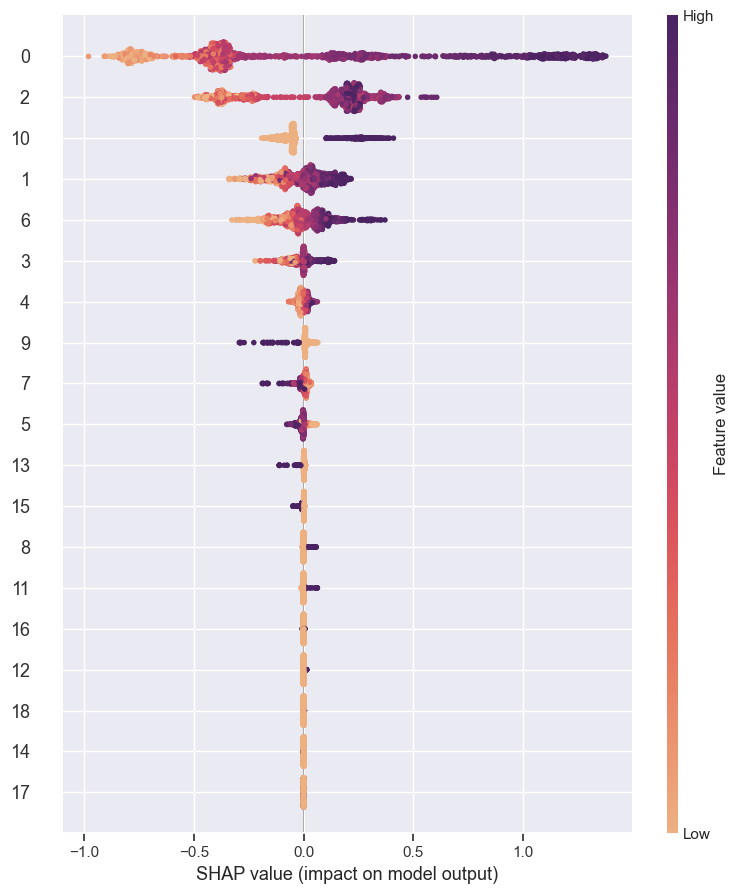

In [62]:
# Use SHAP technique to further investigate the feature importance for the decision tree
explainer_rf = shap.TreeExplainer(rf_regressor)
shap_values_rf = explainer_rf.shap_values(X_train)

sample_idx = 0
shap.initjs()
shap.force_plot(explainer_rf.expected_value, shap_values_rf[sample_idx, :], X_train.iloc[sample_idx, :])

# Visualize the shap scores results
fig, ax = plt.subplots(figsize=(10, 7))
shap.summary_plot(shap_values_rf, X_train, cmap="flare");

# Execute for saving shap values per feature:
#plt.tight_layout()
#fig.savefig("shap_values_rf_regressor_01.png");

### 2. Attempt: Adjusting the hyperparameters (n_estimators, max_depth & min_samples_split)

In [63]:
# Conduct second random forest regression modeling
rf_regressor2 = RandomForestRegressor(
    n_estimators=80,
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=5,
    random_state=42)
rf_regressor2.fit(X_train, y_train)

# Saving random forest regression predictions on test set
y_pred_rf2 = rf_regressor2.predict(X_test)

# Show coefficient of determination for train and test data
print("R² for train data:", rf_regressor2.score(X_train, y_train))
print("R² for test data:", rf_regressor2.score(X_test, y_test))

# Show performance metrics MAE, MSE, RMSE
mse_rf2 = mean_squared_error(y_test, y_pred_rf2)
rmse_rf2 = np.sqrt(mse_rf2)
mae_rf2 = mean_absolute_error(y_test, y_pred_rf2)
print("Mean Squared Error:", mse_rf2, "\nRoot Mean Squared Error:", rmse_rf2, "\nMean Absolute Error:", mae_rf2)

R² for train data: 0.9058788467504373
R² for test data: 0.8551710425451733
Mean Squared Error: 0.18063902958402203 
Root Mean Squared Error: 0.425016505072476 
Mean Absolute Error: 0.3235698223324513


In [64]:
# Display the estimated importance of each feature
rf_feat_importances2 = pd.DataFrame(rf_regressor2.feature_importances_, columns=["Importance"])
rf_feat_importances2.rename(index={0:"Log GDP per capita", 1:"Social support", 2:"Healthy life expectancy at birth", 3:"Freedom to make life choices", 4:"Generosity", 5:"Perceptions of corruption", 6:"Positive affect", 7:"Negative affect",
             8:"Commonwealth of Independent States" , 9:"East Asia", 10:"Latin America and Caribbean", 11:"Middle East and North Africa", 12:"North America and ANZ", 13:"South Asia", 14:"Southeast Asia", 15:"Sub-Saharan Africa", 16:"Western Europe", 17:"post", 18:"pre"}, inplace=True)
rf_feat_importances2.sort_values(by="Importance", ascending=False, inplace=True)
display(rf_feat_importances2)

,Importance
Log GDP per capita,0.601438
Healthy life expectancy at birth,0.175096
Positive affect,0.051716
Social support,0.047926
Latin America and Caribbean,0.042524
Freedom to make life choices,0.026415
Perceptions of corruption,0.016667
Negative affect,0.013421
Generosity,0.009876
East Asia,0.006578


### 3. Attempt: Removing pre/post and regional indicators Sub-Saharan Africa, CIS, Middle East, Western Eruope, Southeast Asia, North America (= least important regions as of SHAP)

In [65]:
# Removing pre/post and the 6 least important regions 
X_train_5 = pd.DataFrame(X_train).rename(columns={0:"Log GDP per capita", 1:"Social support", 2:"Healthy life expectancy at birth", 3:"Freedom to make life choices", 4:"Generosity", 5:"Perceptions of corruption", 6:"Positive affect", 7:"Negative affect",
             8:"Commonwealth of Independent States" , 9:"East Asia", 10:"Latin America and Caribbean", 11:"Middle East and North Africa", 12:"North America and ANZ", 13:"South Asia", 14:"Southeast Asia", 15:"Sub-Saharan Africa", 16:"Western Europe", 17:"post", 18:"pre"})
X_train_5 = X_train_5.drop(["Commonwealth of Independent States" , "Middle East and North Africa", "North America and ANZ", "Southeast Asia", "Sub-Saharan Africa", "Western Europe", "post", "pre"], axis=1)
X_test_5 = pd.DataFrame(X_test).rename(columns={0:"Log GDP per capita", 1:"Social support", 2:"Healthy life expectancy at birth", 3:"Freedom to make life choices", 4:"Generosity", 5:"Perceptions of corruption", 6:"Positive affect", 7:"Negative affect",
             8:"Commonwealth of Independent States" , 9:"East Asia", 10:"Latin America and Caribbean", 11:"Middle East and North Africa", 12:"North America and ANZ", 13:"South Asia", 14:"Southeast Asia", 15:"Sub-Saharan Africa", 16:"Western Europe", 17:"post", 18:"pre"})
X_test_5 = X_test_5.drop(["Commonwealth of Independent States" , "Middle East and North Africa", "North America and ANZ", "Southeast Asia", "Sub-Saharan Africa", "Western Europe", "post", "pre"], axis=1)

In [66]:
# Conduct third random forest regression modeling
rf_regressor3 = RandomForestRegressor(
    n_estimators=80,
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=5,
    random_state=42)
rf_regressor3.fit(X_train_5, y_train)

# Saving random forest regression predictions on test set
y_pred_rf3 = rf_regressor3.predict(X_test_5)

# Show coefficient of determination for train and test data
print("R² for train data:", rf_regressor3.score(X_train_5, y_train))
print("R² for test data:", rf_regressor3.score(X_test_5, y_test))

# Show performance metrics MAE, MSE, RMSE
mse_rf3 = mean_squared_error(y_test, y_pred_rf3)
rmse_rf3 = np.sqrt(mse_rf3)
mae_rf3 = mean_absolute_error(y_test, y_pred_rf3)
print("Mean Squared Error:", mse_rf3, "\nRoot Mean Squared Error:", rmse_rf3, "\nMean Absolute Error:", mae_rf3)

R² for train data: 0.9052183160092327
R² for test data: 0.8526107104177357
Mean Squared Error: 0.18383242349530093 
Root Mean Squared Error: 0.42875683492546324 
Mean Absolute Error: 0.32675392669575387


In [67]:
# Display the estimated importance of each feature
rf_feat_importances3 = pd.DataFrame(rf_regressor3.feature_importances_, columns=["Importance"])
rf_feat_importances3.rename(index={0:"Log GDP per capita", 1:"Social support", 2:"Healthy life expectancy at birth", 3:"Freedom to make life choices", 4:"Generosity", 5:"Perceptions of corruption", 6:"Positive affect", 7:"Negative affect",
             8:"East Asia", 9:"Latin America and Caribbean", 10:"South Asia"}, inplace=True)
rf_feat_importances3.sort_values(by="Importance", ascending=False, inplace=True)
display(rf_feat_importances3)

,Importance
Log GDP per capita,0.602003
Healthy life expectancy at birth,0.176033
Positive affect,0.051739
Social support,0.048459
Latin America and Caribbean,0.042643
Freedom to make life choices,0.026760
Perceptions of corruption,0.017113
Negative affect,0.013964
Generosity,0.010491
East Asia,0.006628


### 4. Attempt: Removing pre/post and all regional indicators

In [68]:
# X_train_3 and X_test_3 fulfill exactly this masking

# Conduct fourth random forest regression modeling
rf_regressor4 = RandomForestRegressor(
    n_estimators=80,
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=5,
    random_state=42)
rf_regressor4.fit(X_train_3, y_train)

# Saving random forest regression predictions on test set
y_pred_rf4 = rf_regressor4.predict(X_test_3)
# Show coefficient of determination for train and test data
print("R² for train data:", rf_regressor4.score(X_train_3, y_train))
print("R² for test data:", rf_regressor4.score(X_test_3, y_test))

# Show performance metrics MAE, MSE, RMSE
mse_rf4 = mean_squared_error(y_test, y_pred_rf4)
rmse_rf4 = np.sqrt(mse_rf4)
mae_rf4 = mean_absolute_error(y_test, y_pred_rf4)
print("Mean Squared Error:", mse_rf4, "\nRoot Mean Squared Error:", rmse_rf4, "\nMean Absolute Error:", mae_rf4)

R² for train data: 0.8998925358939396
R² for test data: 0.8336350319685353
Mean Squared Error: 0.20749998418896362 
Root Mean Squared Error: 0.4555216616023475 
Mean Absolute Error: 0.34978337857909036


In [69]:
# Display the estimated importance of each feature
rf_feat_importances4 = pd.DataFrame(rf_regressor4.feature_importances_, columns=["Importance"])
rf_feat_importances4.rename(index={0:"Log GDP per capita", 1:"Social support", 2:"Healthy life expectancy at birth", 3:"Freedom to make life choices", 4:"Generosity", 5:"Perceptions of corruption", 6:"Positive affect", 7:"Negative affect"}, inplace=True)
rf_feat_importances4.sort_values(by="Importance", ascending=False, inplace=True)
display(rf_feat_importances4)

,Importance
Log GDP per capita,0.608098
Healthy life expectancy at birth,0.181637
Positive affect,0.080698
Social support,0.058040
Freedom to make life choices,0.025717
Perceptions of corruption,0.018605
Generosity,0.014325
Negative affect,0.012880
